In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#load and read csv file
df = pd.read_csv('3) Sentiment dataset.csv')

In [3]:
# nltk stopwords,wordnet,punkt_tab download and text preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

df['processed_text'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
print(df.processed_text)

0                            enjoying beautiful day park
1                               traffic terrible morning
2                               finished amazing workout
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: processed_text, Length: 732, dtype: object


In [5]:
#Feature Extraction TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['Sentiment']

In [6]:
# train and test spilt 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.value_counts())
print(y_test.value_counts())

Sentiment
Positive          35
Joy               34
Excitement        29
Neutral           13
Contentment       11
                  ..
Resilience         1
Overjoyed          1
PlayfulJoy         1
Awe                1
Exhaustion         1
Name: count, Length: 241, dtype: int64
Sentiment
Positive            9
Joy                 8
Happy               6
Excitement          3
Frustration         3
                   ..
Bitter              1
Ambivalence         1
Calmness            1
Jealousy            1
Loneliness          1
Name: count, Length: 97, dtype: int64


In [7]:
#Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
#Model Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
                        precision    recall  f1-score   support

         Acceptance          1.00      0.00      0.00         2
           Admiration        1.00      0.00      0.00         1
        Admiration           1.00      0.00      0.00         1
         Affection           1.00      0.00      0.00         1
      Ambivalence            1.00      0.00      0.00         1
         Anger               1.00      0.00      0.00         1
        Anticipation         1.00      0.00      0.00         1
        Arousal              1.00      0.00      0.00         3
                  Awe        1.00      0.00      0.00         1
         Awe                 1.00      0.00      0.00         1
                  Bad        1.00      0.00      0.00         1
             Betrayal        1.00      0.00      0.00         2
     

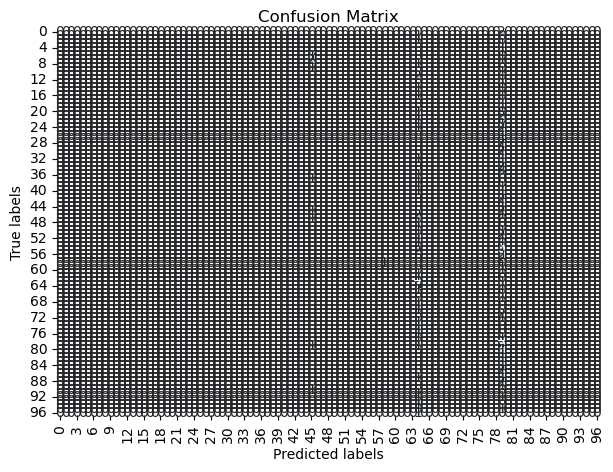

In [9]:
#visualization confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()